# <center>**TASK2 (PART-ll)**

# <center>**EXPLORATORY DATA ANALYSIS**</center>

### <center>**EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists.**

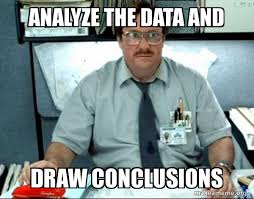 </center>

### **Steps involved in EDA**

###The steps mentioned below are helpful in performing EDA.You are suggested to do it if applicable in the dataset.

- Check the shape of the data frame.
- Check for null values.
- Convert the variables into appropriate data types if there is a mismatch.
- Check for the frequency of different classes in case of a categorical variable.
- Check for distribution of continuous variables

###Below is a checklist to guide you while performing EDA.

- What kind of data do you have?
- What’s missing from the data?
- Where are the outliers?
- How can you add, change or remove features to get more out of your data?
  - Feature Selection
  - Handling missing values
  - Handling skewed data
  - Handling outliers
  - Encoding
  - Feature Scaling

Finally we have the most important question, 
"What question are you trying to solve ?"  
You need to think about questions you can ask of a dataset.  
Questions can be simple as "What is the number of survivors?" or 
"Which gender had a better chance of survival?"  
You goal is to formulate your questions and making inferences.


### **Resources**
Watching:

- [EDA using Python](https://www.youtube.com/watch?v=-o3AxdVcUtQ)
- [Feature Selection-How To Drop Features Using Pearson Correlation](https://www.youtube.com/watch?v=FndwYNcVe0U&list=PLZoTAELRMXVPgjwJ8VyRoqmfNs2CJwhVH&index=2)


Reading:

- [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/)
- [Handling Skewness in Machine Learning](https://beingdatum.com/handling-skewness-in-machine-learning/)
- [Transforming Skewed Data for Machine Learning](https://opendatascience.com/transforming-skewed-data-for-machine-learning/)
- [5 Ways to Detect Outliers/Anomalies That Every Data Scientist Should Know](https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623)
- [Box Plot Diagram to Identify Outliers](https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/)
- [Convert a categorical variable to a number for Machine Learning Model Building](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02)


In [2]:
# run this cell before proceeding further
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2021-07-11 09:13:05--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.01s   

2021-07-11 09:13:05 (5.55 MB/s) - ‘titanic.csv’ saved [61194/61194]



*Make sure to run the above cell before loading the data*

Use the 'titanic.csv' dataset for the questions in this section.

#### **Using the concepts learnt till now perform EDA on the titanic datset**.

#### The goal of this analysis is to analyse the data set, explore it answering related questions using data visualization and statistical methods.
**With Titanic dataset analysis draw minimum 5 conclusions from  and also answer the following questions .**

1)What is the overall passengers survival ratio?

2)Which groups have higher chances for survival?


In [3]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic_df.shape

(891, 12)

In [ ]:
titanic_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Data Cleanup**

In [8]:
cleaned = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Exploratory Data Analysis**

In [ ]:
passengers = len(titanic_df)
survivors = len(titanic_df[titanic_df.Survived==True])
survivors_ratio = survivors/passengers
survivors_ratio

0.3838383838383838

* The overall passengers survival ratio is 0.38. This shows only 38% of the passengers survived.

Text(0.5, 1.0, 'Agewise distribution of the passengers')

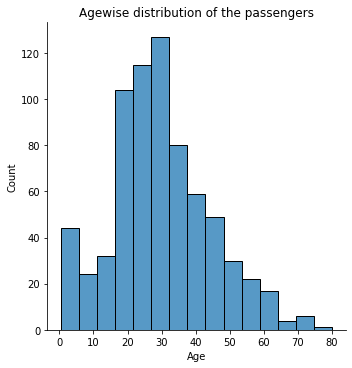

In [15]:
sns.displot(cleaned['Age'].dropna(), bins=15, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passengers')


* We can see from the above graph that many passengers are of age 15 to 40 years

In [ ]:
pd.crosstab(titanic_df['Survived'],titanic_df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


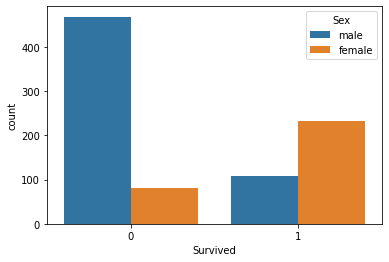

In [31]:
sns.countplot(x='Survived',hue='Sex', data=titanic_df)

* This shows that the **females** have higher chances of survival as compared to males.

In [27]:
cleaned.groupby(['Pclass'])['Survived'].sum()/cleaned.groupby(['Pclass'])['Survived'].count()*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

* 
As we can conlude that **Pclass = 1** have the highest chances of survival.

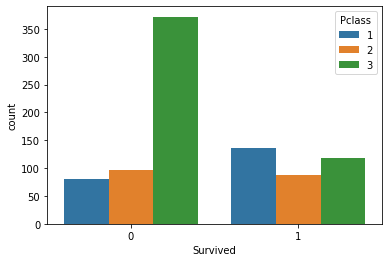

In [35]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_df)



* 
Here we can conlude that **Pclass = 3** has lowest chances of survival. That is passengers belonging to class 3 died the most.

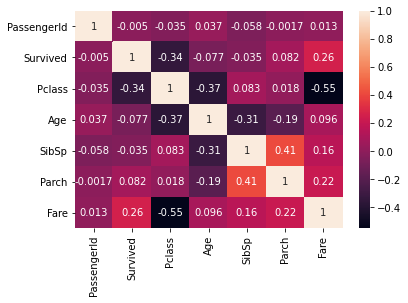

In [30]:
corelation = titanic_df.corr()
sns.heatmap(corelation,annot=True)

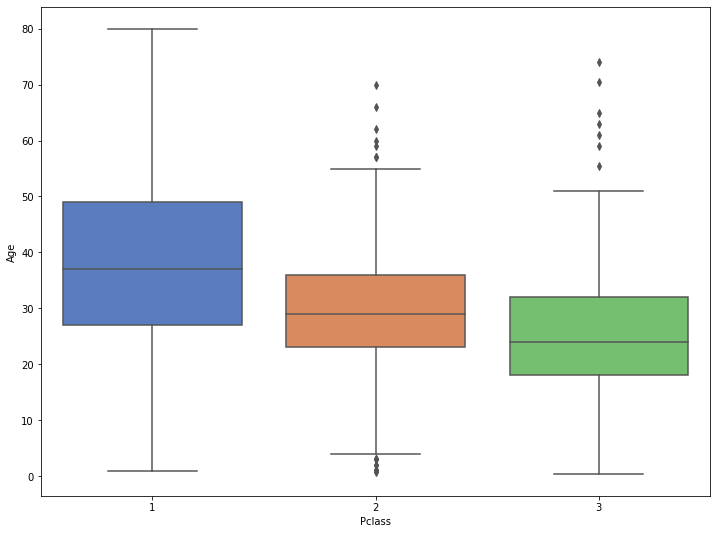

In [37]:
plt.figure(figsize=(12,9))
sns.boxplot(x='Pclass',y='Age',data=titanic_df,palette='muted')



* Also we can conclude that passengers in the higher classes that is in Pclass = 1 tend to be older.